# 1. Importing Datasets

Link from which the dataset is taken: https://www.kaggle.com/datasets/bytadit/transactional-ecommerce/data

In this assignment, the number of datasets considered are 4:

### a. click_stream.csv
This dataset consists of entries clicked by potential customers on various e-commerce websites

### b. customer.csv
This dataset provides personal information of customers already registered on the e-commerce websites

### c. product.csv
This dataset provides information of the products bought from e-commerce websites, based on their physical characteristics, gender demographic and time of the year.

### d. transactions.csv
This dataset gives information of the payment details and shipment  details of the potential purchases.


In [2]:
#Importing libraries

#to import the dataset
import pandas as pd

#to execute different plots and visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the four datasets used in this assignment

#Click Stream dataset
click_stream = pd.read_csv('click_stream.csv')

#Customer dataset
customer = pd.read_csv('customer.csv')

#Product dataset
product = pd.read_csv('product.csv')

#transactions dataset
transactions = pd.read_csv('transactions.csv')

## Click Stream Dataset

In [4]:
#displaying first 10 entries of the dataset
click_stream.head(10)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01T12:07:00.322763Z,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'}
6,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:08:27.322763Z,365b3840-9647-4bf5-917f-f0bec3d05332,MOBILE,NaN
7,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09-01T12:09:49.322763Z,1a1e3548-108e-4520-bf04-1b01d43a72cb,MOBILE,NaN
8,7d440441-e67a-4d36-b324-80ffd636d166,SCROLL,2019-09-01T12:11:06.322763Z,f7246095-b094-46c1-b2ac-bcfd080146c3,MOBILE,NaN
9,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09-01T12:12:19.322763Z,74a000dc-b931-4c59-abcc-02e991623bc1,MOBILE,NaN


In [5]:
#to display the datatyoe of each variable of a dataset
click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


### Info on the dataset 'click_stream.csv'
This dataset consists of 6 variables, with each variable being the 'object' datatype and consisting of 12833601 entires.
1. session_id: the id of the online session created the moment the website is opened
2. event_name: the nature of the activity carried out by the individual on the website
3. event_time: The time when the event is taking place
4. event_id: the id of the specific activity taking place
5. traffic_source: The device on which the activity takes place
6. event_metadata: The outcome of the session and event that a potential customer was a part of

In [6]:
#to find missing values in the dataset
click_stream.isnull().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64

From this dataset, we find that the variable 'event_metadata' has 8544062 missing values out of 12833601 values. To avoid losing the data in the  this dataset, we shall split the dataset into two parts:
1. click_noevent: the dataset without the column 'event_metadata'
2. click_event: the dataset with the column 'event_metadata'

In [7]:
#dropping all the rows with missing values in the row 'event_metadata' of the dataset 'click_stream.csv'
click_event = click_stream.dropna(axis=0)
click_event

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01T12:07:00.322763Z,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'}
12,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09T05:06:03.425431Z,c1b42157-39a7-4521-a4dc-ed0200de301a,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric..."
13,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09T05:23:36.425431Z,61cbe834-c585-406e-8eac-30f671e51fbb,MOBILE,"{'product_id': 6721, 'quantity': 1, 'item_pric..."
...,...,...,...,...,...,...
12833596,ad1063b0-a6e5-40a9-aed6-d1b45741e571,BOOKING,2021-06-07T04:50:54.096245Z,fa07ad46-6e4d-45db-a06a-ced7eb60b80b,MOBILE,{'payment_status': 'Success'}
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,{'search_keywords': 'Bekas'}
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,"{'product_id': 19820, 'quantity': 1, 'item_pri..."
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,{'payment_status': 'Success'}


In [8]:
#select all the rows will null values in the variable 'event_metadata' and place them in a separate dataset declared as 'click_noevent'
click_noevent = click_stream[click_stream[['event_metadata']].isnull().all(axis=1)]
click_noevent

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
6,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:08:27.322763Z,365b3840-9647-4bf5-917f-f0bec3d05332,MOBILE,NaN
7,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09-01T12:09:49.322763Z,1a1e3548-108e-4520-bf04-1b01d43a72cb,MOBILE,NaN
...,...,...,...,...,...,...
12833582,f38416ce-51f2-46b0-a476-776d8fed1cb0,HOMEPAGE,2021-08-01T07:47:06.737783Z,7201b838-9d41-429c-a5f7-da4b9b64ca6e,WEB,NaN
12833586,c1ce86f6-858b-4009-af5b-f1483a28d020,HOMEPAGE,2020-09-22T22:30:52.674560Z,74ae05ad-1c63-493f-88d3-cd225cb5ceb5,WEB,NaN
12833590,f5c4bbe0-f977-45bb-af23-6ab524df7777,HOMEPAGE,2022-04-09T20:52:23.132472Z,8eef30df-e285-4541-9d07-d628b408ac8a,MOBILE,NaN
12833594,ad1063b0-a6e5-40a9-aed6-d1b45741e571,HOMEPAGE,2021-06-07T04:31:33.354381Z,0a71bea6-41d5-41fd-9254-f59d21239f0b,MOBILE,NaN


In [9]:
#drop the variable 'event_metadata' in the dataset 'click_stream.csv' as all the values are null values
click_noevent = click_noevent.dropna(axis=1)
click_noevent

,session_id,event_name,event_time,event_id,traffic_source
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE
6,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:08:27.322763Z,365b3840-9647-4bf5-917f-f0bec3d05332,MOBILE
7,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09-01T12:09:49.322763Z,1a1e3548-108e-4520-bf04-1b01d43a72cb,MOBILE
...,...,...,...,...,...
12833582,f38416ce-51f2-46b0-a476-776d8fed1cb0,HOMEPAGE,2021-08-01T07:47:06.737783Z,7201b838-9d41-429c-a5f7-da4b9b64ca6e,WEB
12833586,c1ce86f6-858b-4009-af5b-f1483a28d020,HOMEPAGE,2020-09-22T22:30:52.674560Z,74ae05ad-1c63-493f-88d3-cd225cb5ceb5,WEB
12833590,f5c4bbe0-f977-45bb-af23-6ab524df7777,HOMEPAGE,2022-04-09T20:52:23.132472Z,8eef30df-e285-4541-9d07-d628b408ac8a,MOBILE
12833594,ad1063b0-a6e5-40a9-aed6-d1b45741e571,HOMEPAGE,2021-06-07T04:31:33.354381Z,0a71bea6-41d5-41fd-9254-f59d21239f0b,MOBILE


In [10]:
#checking for any missing values in the dataset stored in 'click_noevent', which stores the rows where the variable 'event_metadata' is not present
click_noevent.isnull().sum()

session_id        0
event_name        0
event_time        0
event_id          0
traffic_source    0
dtype: int64

## Customer Dataset

In [11]:
#display the first 10 rows of the dataset 'customer.csv'
customer.head(10)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11
5,5440,Nadia,Suartini,7bb470a0-4824-4b2c-8754-b45d98c6fa1c,7bb470a0_4824_4b2c_8754_b45d98c6fa1c@startupca...,F,1989-01-09,Android,bcb06a05-2535-4838-bd63-529528268037,Android 4.0.4,-6.277891,106.786538,Jakarta Raya,Indonesia,2021-05-30
6,90319,Banara,Wijaya,79c0c343-3ef3-4862-8f4d-591dbd9a8870,79c0c343_3ef3_4862_8f4d_591dbd9a8870@zakyfound...,M,1990-01-12,Android,4c110df9-59b6-471d-87eb-fd45c0f2868d,Android 8.1.0,0.869352,103.873668,Kepulauan Riau,Indonesia,2019-12-14
7,96453,Talia,Hastuti,44e67d0f-4743-479c-a74b-fc853ea5b355,44e67d0f_4743_479c_a74b_fc853ea5b355@startupca...,F,2005-02-12,Android,eba4a196-7133-4da6-a2b4-d153541edc5b,Android 4.2,-3.908257,102.486909,Bengkulu,Indonesia,2022-01-09
8,8031,Ana,Laksmiwati,c5969dbf-c32b-428c-b8f4-a430def3befd,c5969dbf_c32b_428c_b8f4_a430def3befd@zakyfound...,F,1995-11-01,iOS,17545c14-a543-43ab-8e30-f9195f0336f0,iPad; CPU iPad OS 10_3_3 like Mac OS X,-6.974594,107.634488,Jawa Barat,Indonesia,2019-09-12
9,61533,Adiarja,Utama,57497894-0738-4bcd-8839-f56cfc179ebc,57497894_0738_4bcd_8839_f56cfc179ebc@startupca...,M,1987-02-28,Android,95a24899-f5f1-433e-ac5d-4f8b28c7ca39,Android 4.0.1,-8.386214,120.665656,Nusa Tenggara Timur,Indonesia,2020-01-27


In [12]:
#display the variables present in the dataset 'customer.csv', the number of non-null values per variable and the data type of each variable
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

### Info on the dataset 'customer.csv' 

In this dataset, there are 15 variables, each with 100000 entries. The variables are as follows:

1. Customer_id: personal identification of customer
2. first_name: First name of customer
3. last_name: Last name of customer
4. username: login username of customer for the e-commerce website
5. email: email id of customer
6. gender: gender orientation of customer
7. device_type: the OS used by customer while logging in to the e-commerce website
8. devide_id: unique online identification of the session on the device while logging into the e-commerce website
9. device_version: the device model used by the customer while on the e-commerce website.
10. home_location_lat: latitude of the customer's home location
11. home_location_long: longitude of the customer's home location
12. home_location: customer's home location
13. home_country: customer's home country
14. birthdate: customer's birth date
15. first_join_date: the date when the customer registered on the e-commerce website as a member.


In [13]:
#checking for missing values in the dataset 'customer.csv'
customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

There are no missing values in the dataset 'customer.csv', which shows that it is a perfect dataset, value-wise.

## Product Dataset

In [14]:
#display the first 20 values of the dataset 'product.csv'
product.head(20)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [15]:
#displaying the information on the dataset 'product.csv'
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


### Info on the dataset 'product.csv' 

In this dataset, there are 10 variables, each with 44446 entries, ideally. The variables are as follows:

1. id: personal identification of customer
2. gender: gender orientation of customer
3. masterCategory: Main broadened category of the fashion item bought by the customer
4. subCategory: more redefined information on the category of the fashion item bought by the customer
5. articleType: specific name of the category of the fashion item that indicates the purpose of its usage and the part of the body to use it over.
6. baseColour: Main colour of the item
7. season: One of the four seasons (summer, spring, autumn or winter) in which the item was purchased.
8. year: year in which the item was purchased.
9. usage: occasion for which the item is utilized.
10. productDisplayName: Name of the brand displayed on the label of the product.

In [16]:
#finding missing values of the dataset 'product.csv'
product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In the dataset 'product.csv', the variables 'baseColour', 'season', 'year', 'usage' and 'productDisplayName' have null values in their columns. Depending on the nature of the values of each variable, we will have to deal with the missing values of each variable.

### 1. Variable 'Year'

In the dataframe 'product.csv', the variable 'year' has only one missing value. The first step taken is to check the row containing the missing value.

In [17]:
#displaying the row with null value in the variable 'year' of the dataset 'product.csv'
year = product[product[['year']].isnull().all(axis=1)]
year

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
21285,53781,Men,Apparel,Topwear,Tshirts,Blue,NaN,NaN,Sports,Puma Men Blue Sless Round Neck T-shirt


In the row where the focus is mainly on the missing value for the variable 'year' in the dataset, it is also observed that there is a missing value in the variable 'season'. Since we notice that Tshirts are bought in every year, the most logical approach would be to populate the missing value for year with the most common value for 'year'.

In [18]:
#find the counts of the values in the variable 'year' of the dataframe 'product.csv'
year_count = product.value_counts(product.year)
year_count

year
2012.0    16290
2011.0    13689
2016.0     6007
2017.0     2917
2015.0     2780
2013.0     1213
2010.0      846
2018.0      405
2014.0      236
2019.0       33
2009.0       20
2008.0        7
2007.0        2
dtype: int64

In the dataset 'product.csv', the most common value of the variable 'year' is 2012.0. So we will fill the missing value of the variable 'year' with 2012

In [19]:
#filling the missing value for the variable 'year' in dataset 'product.csv' with the value of 2012.0
product['year'].fillna(2012.0, inplace = True)

#checking to see if there are any more missing values in the variable 'year' of the dataset 'product.csv'
product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    0
usage                 317
productDisplayName      7
dtype: int64

The value of the number of missing values against the variable 'year' is zero, which shows that the missing values in the variable in question has been dealt with.

### 2. Variable 'baseColour'

The next variable to consider in the dataset 'product.csv' is 'BaseColour'. Since the null values are in double digits, a more elaborate approach has been taken. The first step is to study the rows with missing values in the variable 'baseColour'

In [20]:
#display all rows with null values in 'baseColour' variable of the dataset 'product.csv'
basecolour = product[product[['baseColour']].isnull().all(axis=1)]
basecolour

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6207,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
9521,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Black Texas Jeans
12773,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
14302,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
15539,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,2017.0,Casual,Lotus Herbals Quincenourish Quince Seed Nouris...
15721,41355,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Millard Jeans
17281,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS Man Eau De Toilette 75 ml
17652,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
20222,11309,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Floyd Jeans
23497,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


From the rows above, we notice that there are patterns with the values of the other variables in the dataset 'product.csv', of which the variable 'baseColour' is a part of. We first consider the terms of segregation  
articleType: Perfume and Body Mist, Jeans, Face Moisturizer (only one missing value).

Perfume and Body Mist was bought during Spring in 2017, whereas Jeans was bought in the Fall in 2016. The jeans were bought from 'Wrangler' whereas the perfumes were bought from 'GUESS'. The Face Moisturizers was bought in Spring 2017 from 'Lotus'. The values in the variable 'gender', fostering the missing values for the variable 'baseColour', are 'male' and 'female'.

So below, we filter the entire dataset 'product.csv' for these specific values of the variables 'gender' and 'articleType' and check for the most common values, depending on the gender in consideration:

1. 'Men' for 'Perfume and Body Mist'
2. 'men' for 'Jeans'
3. 'Women' for 'Face Moisturisers'
4. 'Women' for 'Perfume and Body Mist'



In [21]:
#pattern for 'Men' for 'Perfume and Body Mist'
product_Perfume_men = product[product['id'].isin(product.loc[product['articleType'].eq('Perfume and Body Mist') & product['gender'].eq('Men'), 'id'])]
product_Perfume_men

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
275,26197,Men,Personal Care,Fragrance,Perfume and Body Mist,Green,Spring,2017.0,Casual,Formula 1 Go Men Perfume
374,44379,Men,Personal Care,Fragrance,Perfume and Body Mist,Black,Spring,2017.0,Casual,ADIDAS Men Intense Touch Perfume
537,26190,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,4711 Kolnisch Wasser Men Perfume
746,26199,Men,Personal Care,Fragrance,Perfume and Body Mist,Black,Spring,2017.0,Casual,Formula 1 Men Power Perfume
903,44142,Men,Personal Care,Fragrance,Perfume and Body Mist,Green,Spring,2017.0,Casual,dunhill Men Fresh Perfume
...,...,...,...,...,...,...,...,...,...,...
43565,45676,Men,Personal Care,Fragrance,Perfume and Body Mist,Brown,Spring,2017.0,Casual,Tabac Original Edc Men Perfume
43702,36714,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Bulgari Men Aqua Pour Homme Perfume
43708,43111,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Paris Hilton Men Heir Perfume
44246,43120,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS by Marciano Men Eau De Toilette 50 ml


In [22]:
#finding the most common baseColour for 'Men' for 'Perfume and Body Mist'
men_perfume_baseColour = product_Perfume_men.value_counts(product_Perfume_men.baseColour)
men_perfume_baseColour

baseColour
Black        83
Blue         73
Silver       31
White        30
Brown        23
Grey         21
Green        20
Red          17
Orange        9
Navy Blue     4
Gold          3
Maroon        3
Purple        2
Yellow        2
Olive         1
Cream         1
Copper        1
Steel         1
Bronze        1
Metallic      1
dtype: int64

When the value of the variable 'gender' is 'men' and the value of the variable 'articleType' is is 'Perfume and body Mist', the most common value of the variable 'BaseColour' is 'Black'

In [23]:
#pattern for 'Women' for 'Perfume and Body Mist'
product_Perfume_women = product[product['id'].isin(product.loc[product['articleType'].eq('Perfume and Body Mist') & product['gender'].eq('Women'), 'id'])]
product_Perfume_women

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
66,43993,Women,Personal Care,Fragrance,Perfume and Body Mist,Pink,Spring,2017.0,Casual,Police Women Passion Perfume
99,43967,Women,Personal Care,Fragrance,Perfume and Body Mist,Red,Spring,2017.0,Casual,DKNY Women Red Delicious Perfume
133,36934,Women,Personal Care,Fragrance,Perfume and Body Mist,Gold,Spring,2017.0,Casual,Giorgio Armani Women Idole Perfume
171,44187,Women,Personal Care,Fragrance,Perfume and Body Mist,White,Spring,2017.0,Casual,Nike Fragrances Women 5th Element Perfume 150 ml
319,44173,Women,Personal Care,Fragrance,Perfume and Body Mist,Pink,Spring,2017.0,Casual,Nike Fragrances Women Trendy Perfume 75ml
...,...,...,...,...,...,...,...,...,...,...
43282,43116,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS Seductive Women EDT Spray
43399,45671,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,J. Del Pozo Women Halloween Perfume
43933,46693,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume
44060,44130,Women,Personal Care,Fragrance,Perfume and Body Mist,Red,Spring,2017.0,Casual,Boss Women Intense Perfume


In [24]:
#most common baseColour for 'Women' for 'Perfume and Body Mist'
women_perfume_baseColour = product_Perfume_women.value_counts(product_Perfume_women.baseColour)
women_perfume_baseColour

baseColour
White             55
Pink              47
Blue              31
Green             20
Purple            16
Red               16
Black             14
Gold              12
Orange            12
Cream             11
Yellow             7
Peach              6
Silver             5
Brown              4
Lavender           4
Beige              3
Grey               3
Off White          2
Turquoise Blue     1
Bronze             1
Magenta            1
dtype: int64

When the value of the variable 'gender' is 'women' and the value of the variable 'articleType' is is 'Perfume and body Mist', the most common value of the variable 'BaseColour' is 'White'

In [25]:
#Pattern for 'men' for 'Jeans'
product_jeans_fall_men = product[product['id'].isin(product.loc[product['articleType'].eq('Jeans') & product['gender'].eq('Men') & product['season'].eq('Fall'), 'id'])]
product_jeans_fall_men

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
339,16508,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,Locomotive Men Washed Blue Jeans
1339,16506,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,Locomotive Men Washed Blue Jeans
1391,13246,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,Palm Tree Kids Boy Washed Blue Jeans
2191,56849,Men,Apparel,Bottomwear,Jeans,Navy Blue,Fall,2012.0,Casual,John Players Men Navy Regular Fit Jeans
2968,13247,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,Palm Tree Kids Boy Washed Blue Jeans
...,...,...,...,...,...,...,...,...,...,...
43604,22784,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,Deniyo Men Washed Blue Jeans
43647,15562,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,Spykar Men Washed Blue Jeans
44062,11332,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,United Colors of Benetton Men Washed Blue Jeans
44274,11335,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,United Colors of Benetton Men Washed Blue Jeans


In [26]:
#most common baseColour for 'men' for 'Jeans'
men = product_jeans_fall_men.value_counts(product_jeans_fall_men.baseColour)
men

baseColour
Blue         116
Black          9
Grey           4
Navy Blue      4
dtype: int64

For the combination of the variables 'gender' as 'men' and 'articleType' as 'jeans, then the value of 'baseColour' is 'blue' 

In [27]:
#number of rows containing Face Moisturizer
basecolour_Moisturisers = product[product['id'].isin(product.loc[product['articleType'].eq('Face Moisturisers'), 'id'])]
basecolour_Moisturisers

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
912,57767,Women,Personal Care,Skin,Face Moisturisers,White,Spring,2017.0,NaN,Lotus Herbals Whiteglow Yogurt Skin Whitening ...
1479,55097,Women,Personal Care,Skin,Face Moisturisers,Gold,Spring,2017.0,Casual,Pond's Gold Radiance Precious Youth Serum
1849,55090,Women,Personal Care,Skin,Face Moisturisers,Silver,Spring,2017.0,Casual,Pond's Flawless White Visible Lightening Daily...
2082,57705,Women,Personal Care,Skin,Face Moisturisers,White,Spring,2017.0,Casual,Lotus Herbals Sandalwood Sun Screen
2362,55099,Women,Personal Care,Skin,Face Moisturisers,Gold,Spring,2017.0,Casual,Pond's Women Gold Radiance Youthful Glow Day C...
...,...,...,...,...,...,...,...,...,...,...
36883,57692,Women,Personal Care,Skin,Face Moisturisers,White,Spring,2017.0,NaN,Lotus Herbals Shea Butter Moisturiser
37743,55350,Women,Personal Care,Skin,Face Moisturisers,White,Spring,2017.0,Casual,Revlon Age Defying Sculpt-Logic Night Cream
38794,57869,Women,Personal Care,Skin,Face Moisturisers,White,Spring,2017.0,Casual,Biotique Bio Saffron Dew Face & Body Cream
39480,57782,Women,Personal Care,Skin Care,Face Moisturisers,Cream,Spring,2017.0,Casual,Lotus Herbals Nutramoist Skin Renewal Daily Cream


In [28]:
#most common baseColour for 'men' for 'Jeans'
Moisturisers = basecolour_Moisturisers.value_counts(basecolour_Moisturisers.baseColour)
Moisturisers

baseColour
White     27
Cream      8
Gold       6
Silver     6
Green      5
Black      4
Beige      1
Blue       1
Pink       1
Yellow     1
dtype: int64

Since the most common value for the variable 'baseColour' is 'White', the missing value for the variable 'baseColour' in the row containing the value of the 'articleType' as 'Face Moisturizers' is assigned the value 'White'

The most like values for the four defined conditions for filling the missing values of baseColour are: 

1. 'Men' for 'Perfume and Body Mist': Black
2. 'men' for 'Jeans': Blue
3. 'Women' for 'Perfume and Body Mist': White
4. 'Face Moisturisers': 'White'

In [29]:
# Condition 1: Perfume and Body Mist & Men
condition_1 = (product['articleType'] == 'Perfume and Body Mist') & (product['gender'] == 'Men')

# Condition 2: Perfume and Body Mist & Women
condition_2 = (product['articleType'] == 'Perfume and Body Mist') & (product['gender'] == 'Women')

# Condition 3: Jeans & Fall & Men
condition_3 = (product['articleType'] == 'Jeans') & (product['season'] == 'Fall') & (product['gender'] == 'Men')

# Condition 4: Moisturizers
condition_4 = (product['articleType'] == 'Face Moisturisers')

# Apply conditions and fill missing values
product.loc[condition_1 & product['baseColour'].isnull(), 'baseColour'] = 'Black'
product.loc[condition_2 & product['baseColour'].isnull(), 'baseColour'] = 'White'
product.loc[condition_3 & product['baseColour'].isnull(), 'baseColour'] = 'Blue'
product.loc[condition_4 & product['baseColour'].isnull(), 'baseColour'] = 'White'

In [30]:
#remove the row with the missing value of year
product = product.dropna(subset=["baseColour"])
product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                 21
year                    0
usage                 317
productDisplayName      7
dtype: int64

Since the number of missing values in the variable 'baseColour' is zero, all the missing values are dealt with in that specific variable.

### 4. Variable 'productDisplayName'

In [31]:
#displaying the rows containing null values for 'productDisplayName' for dataset 'product.csv'
productDisplayName = product[product[['productDisplayName']].isnull().all(axis=1)]
productDisplayName

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
3677,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,2012.0,Casual,NaN
14302,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,White,Spring,2017.0,NaN,NaN
17652,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,Black,Spring,2017.0,NaN,NaN
22102,42863,Women,Accessories,Bags,Clutches,Brown,Summer,2012.0,Casual,NaN
23497,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,White,Spring,2017.0,NaN,NaN
37549,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,Black,Spring,2017.0,NaN,NaN
40697,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,Black,Spring,2017.0,NaN,NaN


From the rows above, we realize that the values of the variable 'productDisplayName' depend on the brand of the product and really cannot be determined clearly. So, the decision to fill the missing values with the value 'Unknown' is taken.

In [32]:
#filling the missing value for the variable 'year' in dataset 'product.csv' with the value of 2012.0
product['productDisplayName'].fillna('unknown', inplace = True)

In [33]:
#finding the missing values of the remaining variables
product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                 21
year                    0
usage                 317
productDisplayName      0
dtype: int64

### Variable 'season'

In [34]:
#Displaying the rows with missing values in the variable 'season' in the dataset 'product.csv'
season = product[product[['season']].isnull().all(axis=1)]
season

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
282,5402,Women,Footwear,Shoes,Sports Shoes,Purple,NaN,2011.0,Sports,Kalenji Ekiden 200 Wn Purple 2011
5997,5389,Unisex,Footwear,Shoes,Sports Shoes,Yellow,NaN,2011.0,Sports,Kalenji Kapteren 200 Yellow Fw
6511,5380,Women,Footwear,Shoes,Sports Shoes,Purple,NaN,2011.0,Sports,Quechua Forclaz 100 Lady Purple
12668,5392,Unisex,Footwear,Shoes,Sports Shoes,White,NaN,2011.0,Sports,Kalenji Crossport 100 Whi/champ
13004,5361,Men,Footwear,Shoes,Sports Shoes,Black,NaN,2011.0,Sports,Kipsta F300 Fg Sr Ah09
13533,5368,Men,Footwear,Shoes,Sports Shoes,Red,NaN,2011.0,Sports,Kalenji Kiprun 1000 White Red Ss10
16055,5360,Women,Footwear,Shoes,Sports Shoes,Grey,NaN,2011.0,Sports,Kalenji Kapteren 100 Blue/grey
21285,53781,Men,Apparel,Topwear,Tshirts,Blue,NaN,2012.0,Sports,Puma Men Blue Sless Round Neck T-shirt
23848,5406,Women,Footwear,Shoes,Sports Shoes,Blue,NaN,2011.0,Sports,Kalenji Ekiden Blue Scratch 2011
24211,5401,Women,Footwear,Shoes,Sports Shoes,Blue,NaN,2011.0,Sports,Kalenji Ekiden 100 Lady Blue 2011


In [35]:
#finding the most common value for the variable 'season'
season_count = product.value_counts(product.season)
season_count

season
Summer    21476
Fall      11445
Winter     8519
Spring     2985
dtype: int64

The most common value for the variable 'season' is 'Summer'. So, the missing value for the variable 'season' is filled with the value 'Summer'

In [36]:
#filling the missing values of the variable ;'season' with the value 'summer'
product['season'].fillna('Summer', inplace = True)
product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                  0
year                    0
usage                 317
productDisplayName      0
dtype: int64

The missing values in the variable 'season' has been filled, thus leaving no missing values. The only variable with missing values is 'usage'

### Variable 'usage'

In [37]:
#displaying the rows with missing values in the variable 'usage'
usage = product[product[['usage']].isnull().all(axis=1)]
usage

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
87,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31
92,52029,Unisex,Apparel,Topwear,Rain Jacket,Coffee Brown,Summer,2012.0,NaN,Just Natural Unisex Charcoal Rain Jacket
292,55001,Women,Personal Care,Lips,Lipstick,Pink,Spring,2017.0,NaN,Lakme Absolute Lip Last Day Kiss Lip Colour
479,57563,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,NaN,Lotus Herbals Pure Colours Nutty Brown Lipstic...
511,55006,Women,Personal Care,Lips,Lip Gloss,Copper,Spring,2017.0,NaN,Lakme Sheer Satin Lip Gloss 51
...,...,...,...,...,...,...,...,...,...,...
43655,56605,Women,Personal Care,Makeup,Kajal and Eyeliner,Black,Spring,2017.0,NaN,Streetwear Black Eye Liner 01
44101,57715,Women,Personal Care,Lips,Lip Gloss,Red,Spring,2017.0,NaN,Lotus Herbals Seduction Sappy Watermelon Lip G...
44246,43120,Men,Personal Care,Fragrance,Perfume and Body Mist,Black,Spring,2017.0,NaN,GUESS by Marciano Men Eau De Toilette 50 ml
44249,55045,Women,Personal Care,Lips,Lipstick,Purple,Spring,2017.0,NaN,Lakme Enrich Satins Lipstick 461


In [38]:
#finding the most common value for the 
usage = product.value_counts(product.usage)
usage

usage
Casual          34414
Sports           4025
Ethnic           3208
Formal           2359
Smart Casual       67
Party              29
Travel             26
Home                1
dtype: int64

The most common value of the variable 'usage' is 'Casual'. Hence we shall fill the missing values of the variable 'usage' with the value 'Casual'.

In [39]:
#filling the missing value of 'usage' with 'Casual' and checking the dataset 'product.csv' for missing values.
product['usage'].fillna('Casual', inplace = True)
product.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

Since there are no missing values in the dataset 'product.csv', the missing values in this dataset has been dealt with.

## Transactions Dataset

In [40]:
#Display the first ten rows of the transactions dataset
transactions.head(10)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363823,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363823,198753
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,"[{'product_id': 59620, 'quantity': 1, 'item_pr...",Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.602334,120.363823,181865
6,2019-03-22T11:53:02.365620Z,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,"[{'product_id': 53136, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2019-03-27T14:40:13.181562Z,-7.712608,110.502877,306599
7,2019-05-08T11:29:21.365620Z,4774,0ed6730f-a5db-4e40-9a54-c343474d872c,e7eff973-b499-4b8d-9892-89e67e5fd7d4,"[{'product_id': 14142, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2019-05-10T20:09:58.104955Z,3.293114,98.857043,153913
8,2019-06-24T12:08:52.365620Z,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,"[{'product_id': 12282, 'quantity': 1, 'item_pr...",Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,-6.126016,106.779552,370757
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,"[{'product_id': 53051, 'quantity': 1, 'item_pr...",Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740


### Info on the dataset 'transactions.csv' 

The variables are as follows:

1. created_at: date and time of the creation of the order
2. customer_id: customer unique identification
3. booking_id: unique id of the booking order
4. session_id: id of the online session used for the transaction
5. product_metadata: information on the product
6. payment_method: mode of payment
7. payment_status: indication on whether the payment was successful or not
8. promo_amount: value of promo code
9. promo_code: unique id of the code to use
10. shipment_fee: payment value of shipping the product
11. shipment_date_limit: latest date by which the item is shipped to customer.
12. shipment_location_lat: latitude of shipping location
13. shipment_location_long: longitude of shipping location
14: total_amount: total cost of specific item

In [41]:
#to check if there are any missing values in the dataset
transactions.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

From the information of the dataset, it is observed that each variable consists of 852584 values, except the variable 'promo_code', which has only 326536 values. This indicates that there could possibly be missing values in the entries of the variable 'promo_code', which indicates that 526048 customers probaly did not take a promo code with their orders and transactions.

In [42]:
#customer who did not use promo code
transactions_nopromo = transactions[transactions['session_id'].isin(transactions.loc[transactions['promo_amount'].eq(0), 'session_id'])]
transactions_nopromo

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363823,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363823,198753
6,2019-03-22T11:53:02.365620Z,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,"[{'product_id': 53136, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2019-03-27T14:40:13.181562Z,-7.712608,110.502877,306599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852574,2022-06-08T02:44:08.144627Z,99675,ca733563-1455-482d-bae0-e47337304019,8d71b0a4-e0f8-47ea-9de4-b11c0db924c1,"[{'product_id': 15331, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2022-06-09T03:06:35.978567Z,-8.093308,110.709094,237077
852576,2016-09-22T00:46:56.728174Z,16528,e3877a13-8283-4b71-adb6-55e22ca62247,0a166859-a3de-4b8e-8c5c-90b58e5122f1,"[{'product_id': 20764, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,5000,2016-09-27T13:11:08.654682Z,3.347205,106.302090,531721
852577,2016-09-20T09:10:48.484523Z,77554,226a65bf-87e0-423d-9d43-f804883f575a,eccbfc80-8499-4d2c-bcf9-5b27d4e9d528,"[{'product_id': 28377, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2016-09-24T03:04:06.842198Z,-5.862020,106.612865,114354
852578,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,"[{'product_id': 42915, 'quantity': 1, 'item_pr...",Debit Card,Success,0,NaN,10000,2020-11-18T18:06:06.493534Z,-6.286732,106.902229,287688


In [43]:
#list of customers who did not take promo code
transactions_nopromo = transactions_nopromo.dropna(axis=1)
transactions_nopromo

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363823,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363823,198753
6,2019-03-22T11:53:02.365620Z,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,"[{'product_id': 53136, 'quantity': 1, 'item_pr...",Credit Card,Success,0,10000,2019-03-27T14:40:13.181562Z,-7.712608,110.502877,306599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852574,2022-06-08T02:44:08.144627Z,99675,ca733563-1455-482d-bae0-e47337304019,8d71b0a4-e0f8-47ea-9de4-b11c0db924c1,"[{'product_id': 15331, 'quantity': 1, 'item_pr...",Credit Card,Success,0,0,2022-06-09T03:06:35.978567Z,-8.093308,110.709094,237077
852576,2016-09-22T00:46:56.728174Z,16528,e3877a13-8283-4b71-adb6-55e22ca62247,0a166859-a3de-4b8e-8c5c-90b58e5122f1,"[{'product_id': 20764, 'quantity': 1, 'item_pr...",Credit Card,Success,0,5000,2016-09-27T13:11:08.654682Z,3.347205,106.302090,531721
852577,2016-09-20T09:10:48.484523Z,77554,226a65bf-87e0-423d-9d43-f804883f575a,eccbfc80-8499-4d2c-bcf9-5b27d4e9d528,"[{'product_id': 28377, 'quantity': 1, 'item_pr...",Credit Card,Success,0,0,2016-09-24T03:04:06.842198Z,-5.862020,106.612865,114354
852578,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,"[{'product_id': 42915, 'quantity': 1, 'item_pr...",Debit Card,Success,0,10000,2020-11-18T18:06:06.493534Z,-6.286732,106.902229,287688


In [44]:
#dropping all the entries with the missing values in the 'promo_code' variable and renaming the modified dataset as 'trans_promo'
trans_promo = transactions.dropna(axis=0)
trans_promo

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,"[{'product_id': 59620, 'quantity': 1, 'item_pr...",Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.602334,120.363823,181865
8,2019-06-24T12:08:52.365620Z,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,"[{'product_id': 12282, 'quantity': 1, 'item_pr...",Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,-6.126016,106.779552,370757
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,"[{'product_id': 53051, 'quantity': 1, 'item_pr...",Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740
12,2019-12-29T11:54:05.365620Z,4774,01e4aedf-c297-4404-992a-1c9756f19ad9,7a134594-54ed-447a-a87d-a67bea47e109,"[{'product_id': 25734, 'quantity': 1, 'item_pr...",Credit Card,Success,6208,LIBURDONG,10000,2020-01-03T04:09:43.221514Z,-7.118592,113.312235,249616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852575,2022-07-07T09:48:29.144627Z,99675,1849df71-943e-431d-8731-35b75670203a,0aa7c9aa-517e-4c79-b691-137861f4e9af,"[{'product_id': 35318, 'quantity': 1, 'item_pr...",Credit Card,Success,3388,XX2022,0,2022-07-12T23:34:17.670587Z,-8.093308,110.709094,485334
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143


# 4. Time Series

The progress of the total transaction amounts will be charted over time for the following conditions:

1. transaction total amount for the entire dataset.
2. transaction total amount for the dataset with promo codes.
3. transaction total amount for the dataset without promo codes.

In [45]:
#importing libraries to extract the date and time from the variable attribute 'created_at' and convert the extracted values from datatype 'object' to 'datatype' 'datetime'
from datetime import datetime
from datetime import timezone

### Complete Transaction Dataset

In [46]:
# Convert datetime_column to datetime dtype
transactions['created_at'] = pd.to_datetime(transactions['created_at'])

# Extract only the date part
transactions['date_created_at'] = transactions['created_at'].dt.date

# Display the DataFrame
transactions

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,date_created_at
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,2018-07-29
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,2018-07-30
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,2018-09-15
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363823,271012,2018-11-01
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363823,198753,2018-12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21 22:10:05.074873+00:00,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,2021-09-21
852580,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,2021-12-09
852581,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,2021-12-11
852582,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,2019-12-18


In [47]:
#dataset for time series
transactions_counts = transactions[['booking_id', 'date_created_at']].copy()
transactions_counts

,booking_id,date_created_at
0,186e2bee-0637-4710-8981-50c2d737bc42,2018-07-29
1,caadb57b-e808-4f94-9e96-8a7d4c9898db,2018-07-30
2,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,2018-09-15
3,f5e530a7-4350-4cd1-a3bc-525b5037bcab,2018-11-01
4,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,2018-12-18
...,...,...
852579,66f02fa4-c62e-497a-8b6e-be239009b50a,2021-09-21
852580,ccde6b83-ee42-4cce-b2cd-976574886eac,2021-12-09
852581,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,2021-12-11
852582,af7f291a-b01b-4bfd-89a9-237b16368b15,2019-12-18


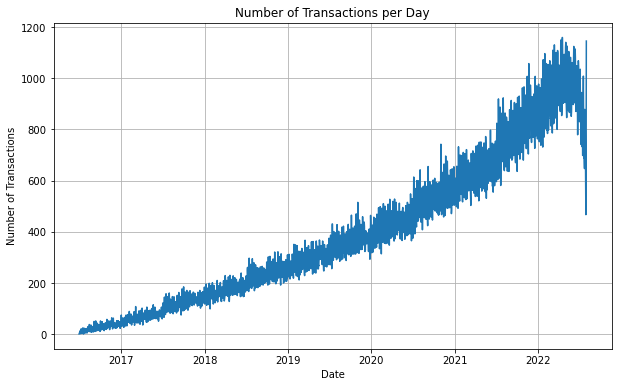

In [48]:
# Group by date and count the number of transactions (booking IDs) per day
transactions_per_day = transactions_counts.groupby('date_created_at').size()

# Plot the time series of numbers of transactions per day
plt.figure(figsize=(10, 6))
transactions_per_day.plot()
plt.title('Number of Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In the above time series for the first case of the complete transactions dataset, the number of transactions increases from 2016 to 2022 and then dips after 2022 before a sharp increase.

C:\Users\olind\AppData\Local\Temp\ipykernel_8488\388480422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_promo['created_at'] = pd.to_datetime(trans_promo['created_at'])
C:\Users\olind\AppData\Local\Temp\ipykernel_8488\388480422.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_promo['date_created_at'] = trans_promo['created_at'].dt.date


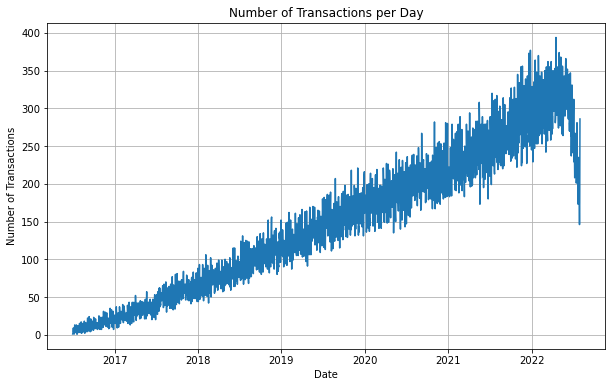

In [49]:
#with promo

# Convert datetime_column to datetime dtype
trans_promo['created_at'] = pd.to_datetime(trans_promo['created_at'])

# Extract only the date part
trans_promo['date_created_at'] = trans_promo['created_at'].dt.date

trans_promo_counts = trans_promo[['booking_id', 'date_created_at']].copy()

# Group by date and count the number of transactions (booking IDs) per day
trans_promo_per_day = trans_promo_counts.groupby('date_created_at').size()

# Plot the time series of numbers of transactions per day
plt.figure(figsize=(10, 6))
trans_promo_per_day.plot()
plt.title('Number of Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In the above time series for the first case of the transactions dataset that includes only transactions with promo codes, the number of transactions increases from 2016 to 2022 and then dips after 2022, before a slight recovery.

C:\Users\olind\AppData\Local\Temp\ipykernel_8488\266894914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_nopromo['created_at'] = pd.to_datetime(transactions_nopromo['created_at'])


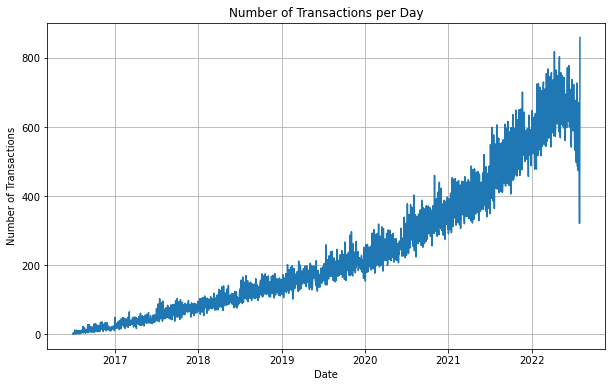

In [50]:
#without promo

# Convert datetime_column to datetime dtype
transactions_nopromo['created_at'] = pd.to_datetime(transactions_nopromo['created_at'])

# Extract only the date part
transactions_nopromo['date_created_at'] = transactions_nopromo['created_at'].dt.date

transactions_nopromo_counts = transactions_nopromo[['booking_id', 'date_created_at']].copy()

# Group by date and count the number of transactions (booking IDs) per day
transactions_nopromo_per_day = transactions_nopromo_counts.groupby('date_created_at').size()

# Plot the time series of numbers of transactions per day
plt.figure(figsize=(10, 6))
transactions_nopromo_per_day.plot()
plt.title('Number of Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In the above time series for the first case of the transactions dataset that includes only transactions without promo codes, the number of transactions increases from 2016 to 2022 and then dips after 2022, before a sharp recovery.

# 5. Histograms

The histograms of the total transaction amounts will be charted for the following conditions:

1. transaction total amount for the entire dataset.
2. transaction total amount for the dataset with promo codes.
3. transaction total amount for the dataset without promo codes.

(array([8.23226e+05, 2.29130e+04, 4.70000e+03, 1.17100e+03, 3.75000e+02,
        1.44000e+02, 3.40000e+01, 1.50000e+01, 2.00000e+00, 4.00000e+00]),
 array([1.08980000e+04, 2.36025690e+06, 4.70961580e+06, 7.05897470e+06,
        9.40833360e+06, 1.17576925e+07, 1.41070514e+07, 1.64564103e+07,
        1.88057692e+07, 2.11551281e+07, 2.35044870e+07]),
 <BarContainer object of 10 artists>)

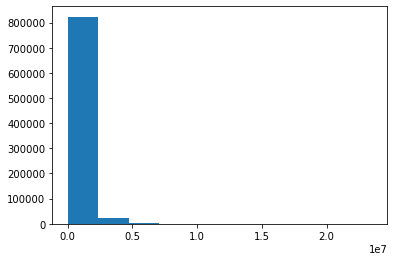

In [51]:
#plotting histogram of total amount of the entire transactions dataset
plt.hist(transactions['total_amount'])

In the case of all the transaction amounts in the dataset, the most number of transactions, just above 800000, reaches the total monetary amount till 0.2 * 10^(7), whereas a small amount of orders between 0 and 100000 fall in the total amount between 0.2 * 10^(7) and 0.8 * 10^(7).

(array([3.13574e+05, 9.92500e+03, 2.12500e+03, 6.48000e+02, 1.59000e+02,
        7.00000e+01, 2.40000e+01, 8.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([1.3415000e+04, 2.1824550e+06, 4.3514950e+06, 6.5205350e+06,
        8.6895750e+06, 1.0858615e+07, 1.3027655e+07, 1.5196695e+07,
        1.7365735e+07, 1.9534775e+07, 2.1703815e+07]),
 <BarContainer object of 10 artists>)

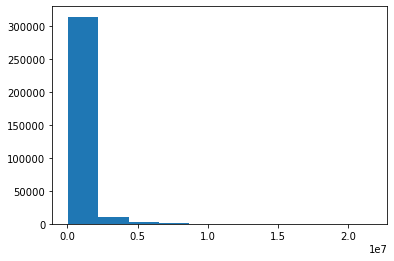

In [52]:
#with promo
plt.hist(trans_promo['total_amount'])

In the case of the transaction amounts with the promo code, the most number of transactions, just above 300000, reaches the total monetary amount till 0.2 * 10^(7), whereas a small amount of orders between 0 and 100000 fall in the total amount between 0.2 * 10^(7) and 0.8 * 10^(7).

(array([5.08003e+05, 1.39790e+04, 2.98100e+03, 7.02000e+02, 2.46000e+02,
        1.06000e+02, 1.70000e+01, 1.00000e+01, 2.00000e+00, 2.00000e+00]),
 array([1.08980000e+04, 2.36025690e+06, 4.70961580e+06, 7.05897470e+06,
        9.40833360e+06, 1.17576925e+07, 1.41070514e+07, 1.64564103e+07,
        1.88057692e+07, 2.11551281e+07, 2.35044870e+07]),
 <BarContainer object of 10 artists>)

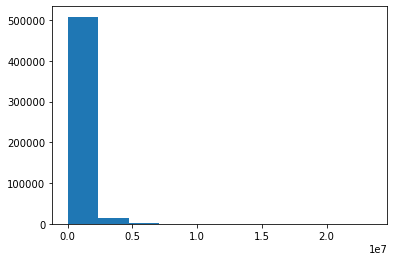

In [53]:
#without promo
plt.hist(transactions_nopromo['total_amount'])

In the case of the transaction amounts without the promo code, the most number of transactions, just above 500000, reaches the total monetary amount till 0.25 * 10^(7), whereas a small amount of orders between 0 and 100000 fall in the total amount between 0.25 * 10^(7) and 0.75 * 10^(7).

# 6. Relationship between Unit Quantities and Unit Prices


In [54]:
#checking the first five rows of the dataset 'transactions.csv'
transactions.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,date_created_at
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,2018-07-29
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,2018-07-30
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,2018-09-15
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363823,271012,2018-11-01
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363823,198753,2018-12-18


In the dataset 'transactions.csv', it is observed that the variable 'product_metadata consists of dictionaries in each entry, with each entry displaying the same attributes, namely 'product_id', 'quantity' and 'item_price'. The variable 'product_metadata' will be divided and converted into a separate dataframe named 'total_price.csv'

In [55]:
#Splitting the variable 'product_metadata' into its 3 respective columns: 'product_id', 'quantity' and 'item_price'
price = pd.DataFrame(transactions.product_metadata.str.split('[{}]', 1).tolist(), columns = ['list_1', 'list_2'])
price_1 = pd.DataFrame(price.list_2.str.split('[{}]', 1).tolist(), columns = ['list_1', 'list_2'])
total_price = pd.DataFrame(price_1.list_1.str.split(', ', 2).tolist(), columns = ['id', 'quantity', 'item_price'])

total_price

,id,quantity,item_price
0,'product_id': 54728,'quantity': 1,'item_price': 191247
1,'product_id': 16193,'quantity': 1,'item_price': 145526
2,'product_id': 53686,'quantity': 4,'item_price': 135174
3,'product_id': 20228,'quantity': 1,'item_price': 271012
4,'product_id': 55220,'quantity': 1,'item_price': 198753
...,...,...,...
852579,'product_id': 30642,'quantity': 2,'item_price': 113410
852580,'product_id': 19394,'quantity': 1,'item_price': 354213
852581,'product_id': 13079,'quantity': 4,'item_price': 288835
852582,'product_id': 11312,'quantity': 1,'item_price': 188646


In [56]:
#eliminating the keywords within the columns 
total_price['id'] = total_price['id'].str.replace("'product_id': ", '')
total_price['quantity'] = total_price['quantity'].str.replace("'quantity': ", '')
total_price['item_price'] = total_price['item_price'].str.replace("'item_price': ", '')
total_price

,id,quantity,item_price
0,54728,1,191247
1,16193,1,145526
2,53686,4,135174
3,20228,1,271012
4,55220,1,198753
...,...,...,...
852579,30642,2,113410
852580,19394,1,354213
852581,13079,4,288835
852582,11312,1,188646


In [57]:
#displaying information of the newly created dataframe 'total_price'
total_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          852584 non-null  object
 1   quantity    852584 non-null  object
 2   item_price  852584 non-null  object
dtypes: object(3)
memory usage: 19.5+ MB


Eventhough the data values of all the variables in the dataset 'total_price' are numerical, the datatype still shows 'object' as they were separated from strings. The conversion of datatype from 'object' to 'int64' (64 bit integer) is carried out

In [58]:
#converting the datatype of the variables of the dataframe 'total_price' from 'object' to 'int64'
total_price['id'] = pd.to_numeric(total_price['id'])
total_price['quantity'] = pd.to_numeric(total_price['quantity'])
total_price['item_price'] = pd.to_numeric(total_price['item_price'])
total_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   id          852584 non-null  int64
 1   quantity    852584 non-null  int64
 2   item_price  852584 non-null  int64
dtypes: int64(3)
memory usage: 19.5 MB


<AxesSubplot:xlabel='quantity', ylabel='item_price'>

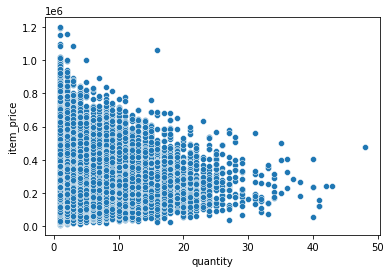

In [59]:
#plotting the graph of 'item_price' with respect to 'quantity'
sns.scatterplot(x="quantity", y="item_price", data=total_price)

The number of transactions is maximum, where the quantity of products per transaction is between 1 and 10 and the item_price reaches 1.2 million. As the quantity of products per transaction increases, the 'item_price' decreases, till it scatters around the quantity per transaction being 40 and only one order being with the quantity at almost 50.

# 7. Top-Selling Products

In [60]:
#displaying the top 5 rows of the dataset 'product.csv'
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [61]:
#find the product purchase 
articleType_count = product.value_counts(product.articleType)
articleType_count

articleType
Tshirts                7070
Shirts                 3217
Casual Shoes           2846
Watches                2542
Sports Shoes           2036
                       ... 
Ipad                      1
Cushion Covers            1
Body Wash and Scrub       1
Shoe Laces                1
Suits                     1
Length: 143, dtype: int64

The top five selling products are:
1. Tshirts: 7069
2. Shirts: 3217
3. Casual Shoes: 2846
4. Watches: 2542
5. Sports Shoes: 2036

# 8. Most Frequent Customer

The value counts of the customer ids will be charted for the following conditions:

1. transaction total amount for the entire dataset.
2. transaction total amount for the dataset with promo codes.
3. transaction total amount for the dataset without promo codes.

In [62]:
#all customers
Customer = transactions.value_counts(transactions.customer_id)
Customer

customer_id
43202    550
29496    505
82237    503
10167    473
69740    458
        ... 
80493      1
80494      1
14513      1
80510      1
99999      1
Length: 50705, dtype: int64

In [63]:
#most frequent customers who used promo code
Customer_promo = trans_promo.value_counts(trans_promo.customer_id)
Customer_promo

customer_id
43202    348
29496    333
16398    234
10167    222
82237    214
        ... 
78319      1
53875      1
78324      1
11433      1
34601      1
Length: 38880, dtype: int64

In [64]:
#most frequent customer who did not use promo code
Customer_nopromo = transactions_nopromo.value_counts(transactions_nopromo.customer_id)
Customer_nopromo

customer_id
95492    318
82237    289
69740    266
38588    261
5816     251
        ... 
53671      1
53674      1
53688      1
53689      1
99999      1
Length: 45899, dtype: int64

The customer id most frequent customer for the following conditions:
1. transaction total amount for the entire dataset: 43202
2. transaction total amount for the dataset with promo codes: 43202
3. transaction total amount for the dataset without promo codes: 95492

# 9. Analysis

In [65]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   created_at              852584 non-null  datetime64[ns, UTC]
 1   customer_id             852584 non-null  int64              
 2   booking_id              852584 non-null  object             
 3   session_id              852584 non-null  object             
 4   product_metadata        852584 non-null  object             
 5   payment_method          852584 non-null  object             
 6   payment_status          852584 non-null  object             
 7   promo_amount            852584 non-null  int64              
 8   promo_code              326536 non-null  object             
 9   shipment_fee            852584 non-null  int64              
 10  shipment_date_limit     852584 non-null  object             
 11  shipment_location_lat   85

In [66]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44446 non-null  object 
 6   season              44446 non-null  object 
 7   year                44446 non-null  float64
 8   usage               44446 non-null  object 
 9   productDisplayName  44446 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [67]:
transactions.loc[:, "id"] = total_price['id']
transactions.loc[:, "quantity"] = total_price['quantity']
transactions.loc[:, "item_price"] = total_price['item_price']
transactions = transactions.drop("product_metadata", axis='columns')
transactions.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,date_created_at,id,quantity,item_price
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,2018-07-29,54728,1,191247
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,2018-07-30,16193,1,145526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,2018-09-15,53686,4,135174
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363823,271012,2018-11-01,20228,1,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363823,198753,2018-12-18,55220,1,198753


In [68]:
sales = pd.merge(product, transactions, on="id", how="left")

In [69]:
sales.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,date_created_at,quantity,item_price
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,0,NaN,10000,2020-07-11T22:31:25.004940Z,-6.320214,106.813790,690544,2020-07-06,1,680544
1,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,4505,AZ2022,50000,2021-07-21T17:21:48.092705Z,0.118684,111.945939,605587,2021-07-19,1,560092
2,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,0,NaN,10000,2021-12-01T04:47:27.897321Z,-6.141085,106.717371,538393,2021-11-25,1,293495
3,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,0,NaN,10000,2021-12-17T23:20:12.461827Z,-6.632511,108.318702,342049,2021-12-12,1,332049
4,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,3362,LIBURDONG,0,2022-01-28T02:07:52.052100Z,-3.249738,128.760771,217560,2022-01-23,1,220922
5,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,0,NaN,10000,2020-08-26T09:36:58.232461Z,-9.557207,119.819761,206940,2020-08-20,1,196940
6,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,0,NaN,10000,2022-01-28T07:01:30.289062Z,-2.835361,129.540724,423183,2022-01-26,1,413183
7,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,4236,XX2022,10000,2017-06-03T17:55:32.012809Z,-5.199033,104.721420,456758,2017-05-30,2,225497
8,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,4147,WEEKENDSERU,0,2020-04-09T12:01:20.177742Z,-0.409598,104.396360,1700664,2020-04-04,1,200920
9,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,0,NaN,10000,2021-10-10T21:58:32.405600Z,-2.567394,115.425046,505840,2021-10-06,2,247920


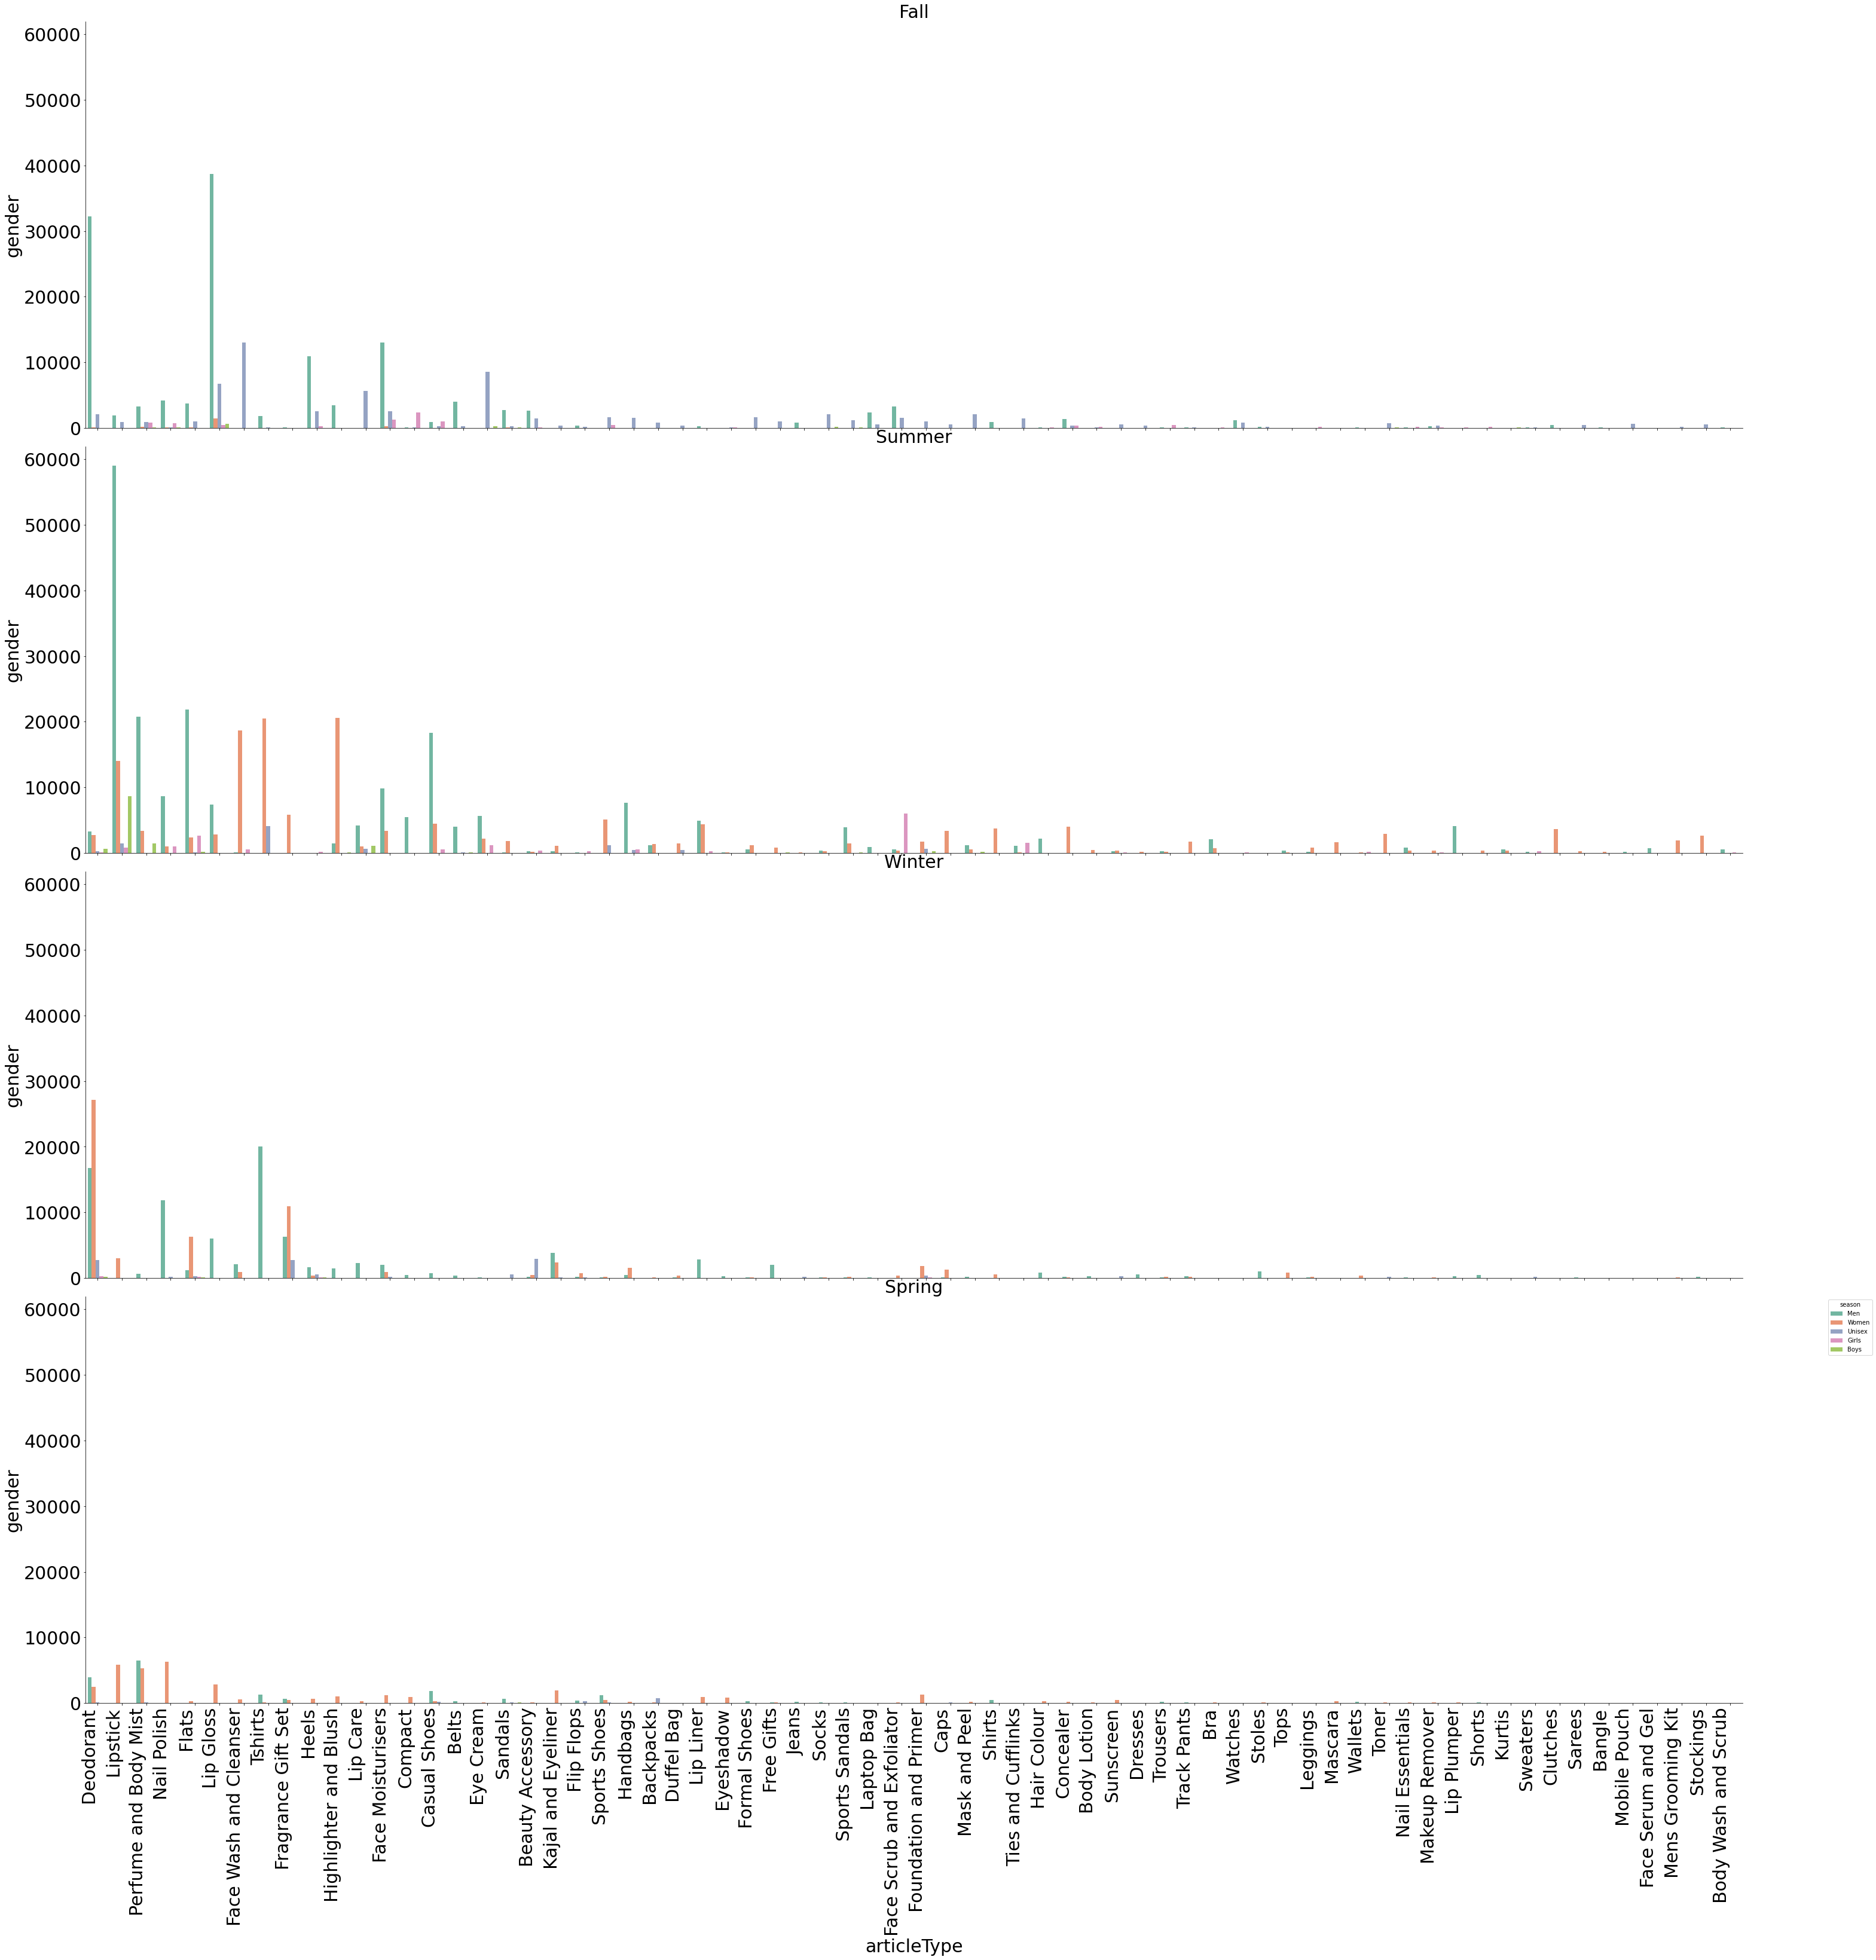

In [75]:
#For Gender vs articleType
# Set up the grid plot
gender_article = sns.FacetGrid(sales, col='season', col_wrap=1, height=10, aspect=4)
gender_article.map_dataframe(sns.countplot, 'articleType', hue = 'gender', palette='Set2', dodge=True)
# Increase label sizes
gender_article.set_axis_labels('articleType', 'gender', size=30)
gender_article.set_titles(col_template="{col_name}", size=30)

for ax in gender_article.axes.flat:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(30)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.legend(title='season', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

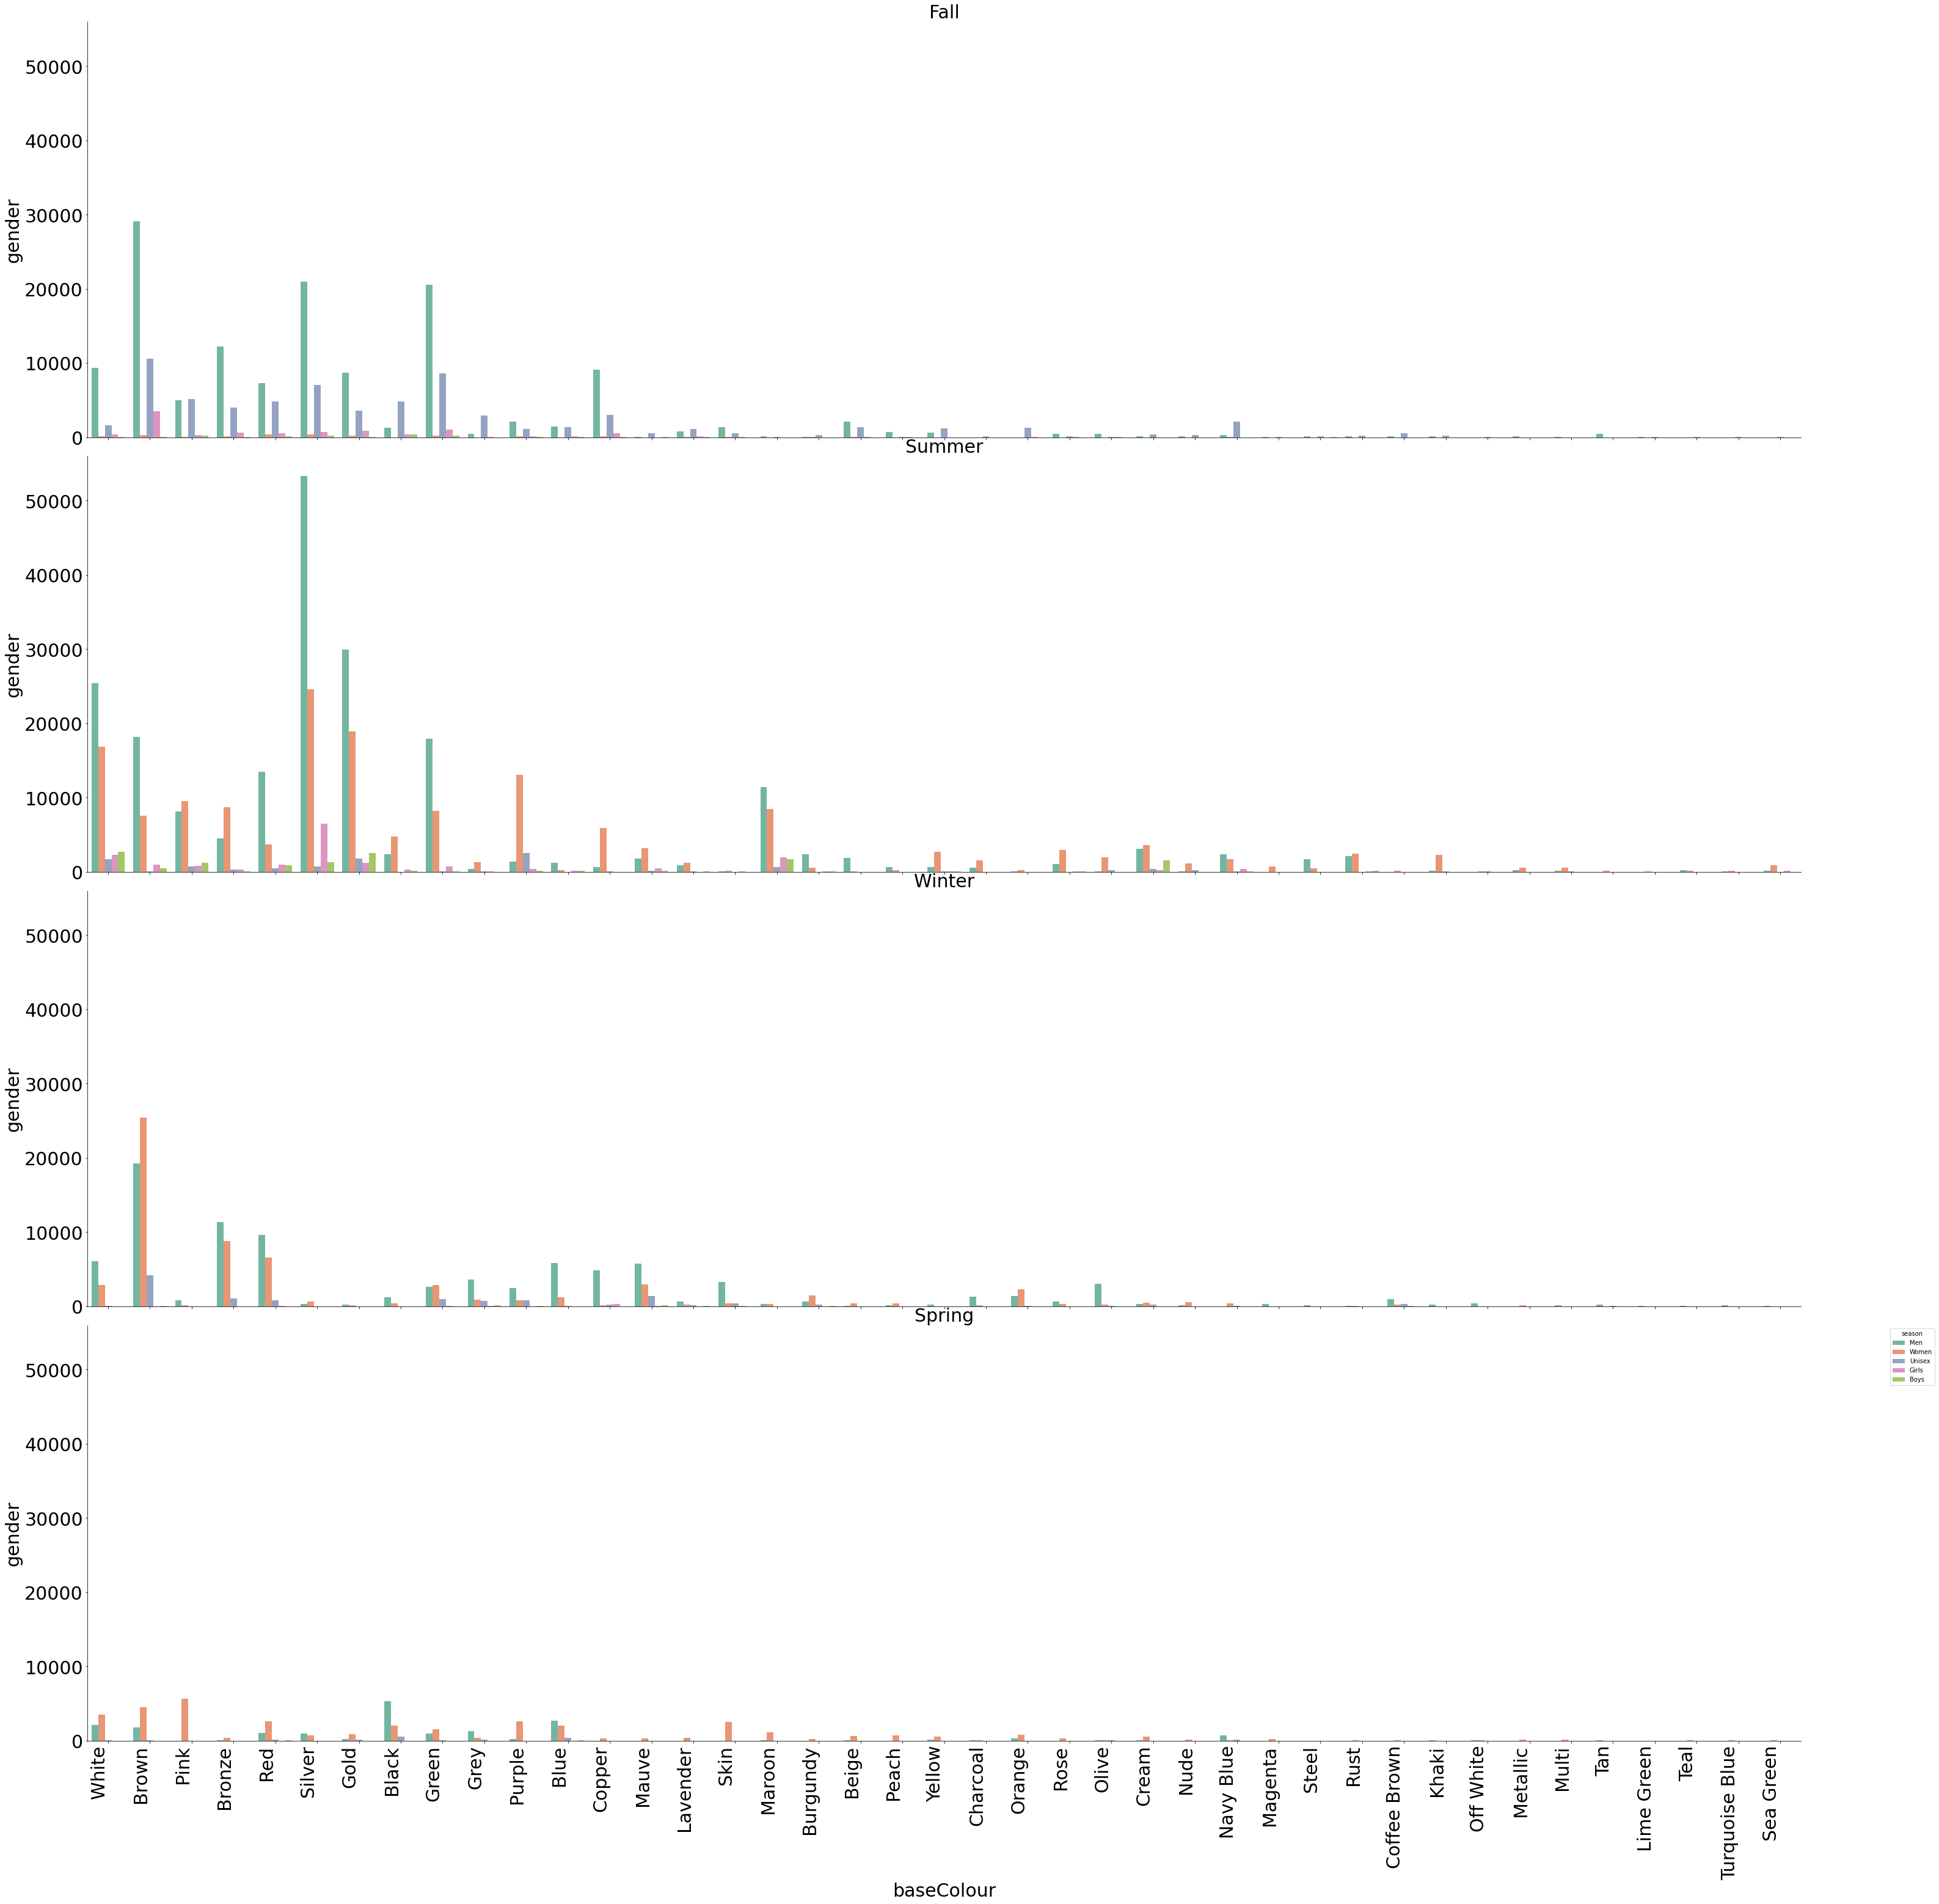

In [76]:
#For Gender vs baseColour
# Set up the grid plot
gender_article = sns.FacetGrid(sales, col='season', col_wrap=1, height=10, aspect=4)
gender_article.map_dataframe(sns.countplot, 'baseColour', hue = 'gender', palette='Set2', dodge=True)
# Increase label sizes
gender_article.set_axis_labels('baseColour', 'gender', size=30)
gender_article.set_titles(col_template="{col_name}", size=30)

for ax in gender_article.axes.flat:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(30)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.legend(title='season', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

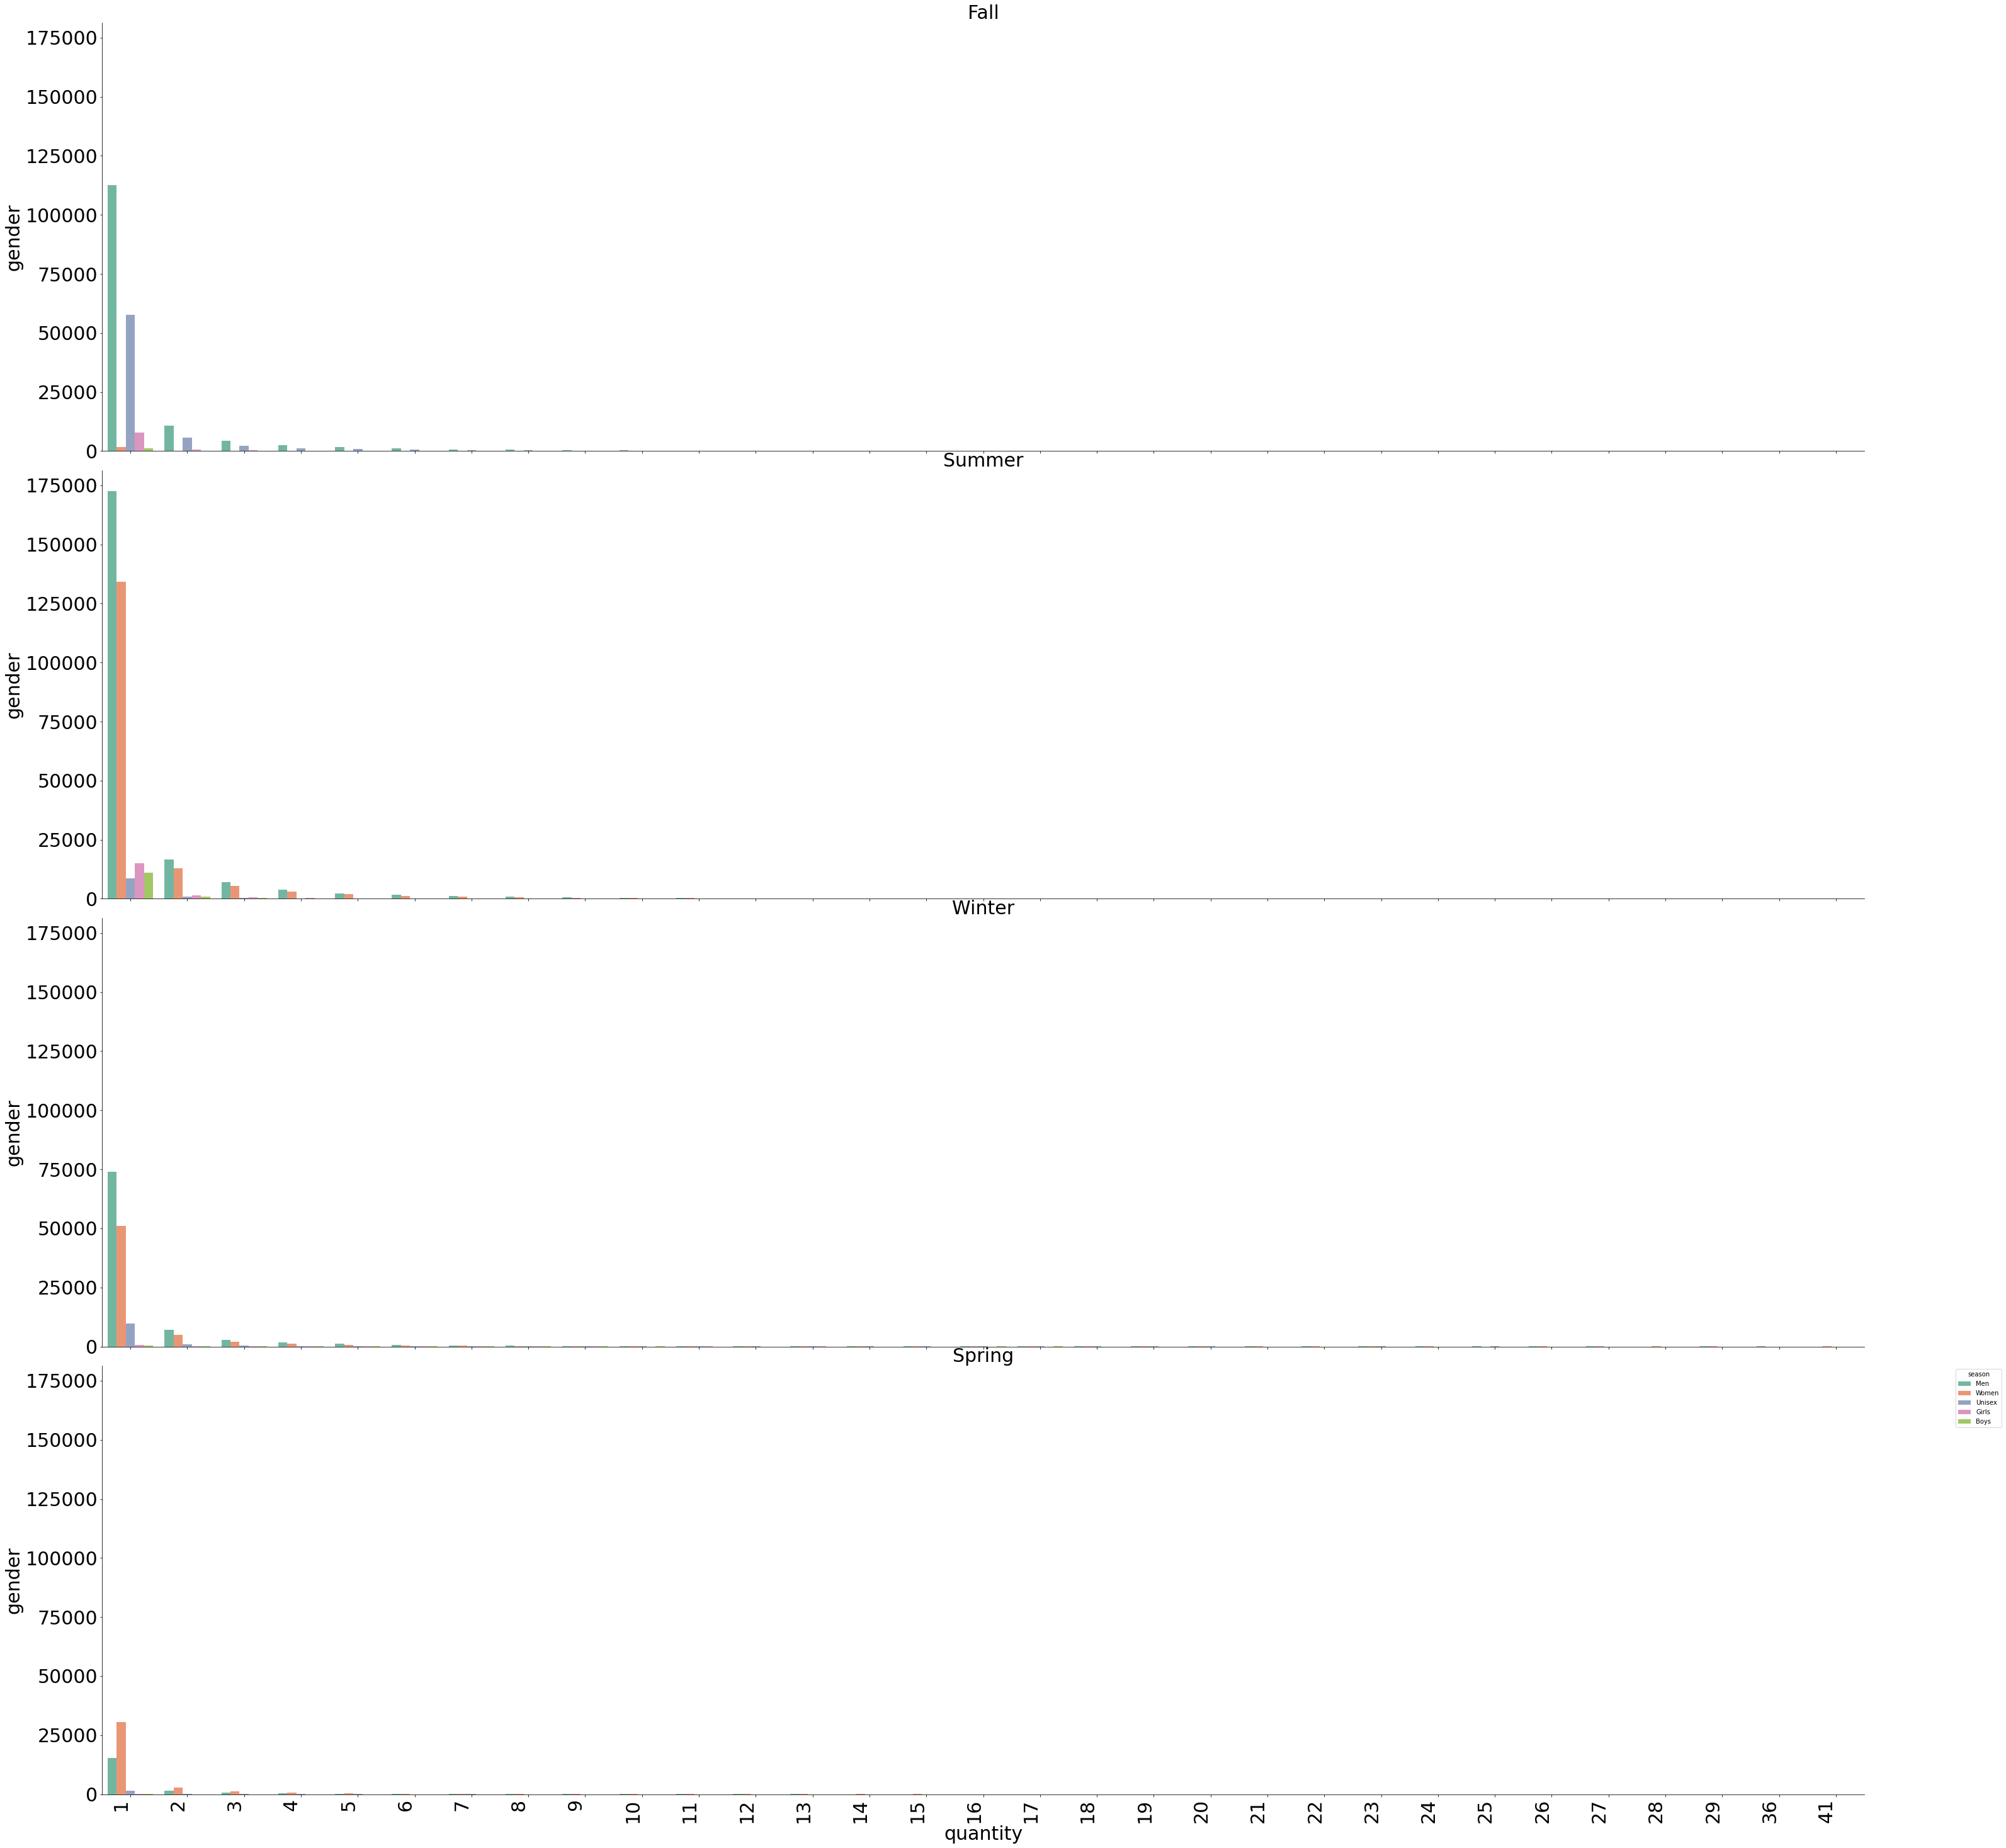

In [74]:
#For Gender vs Quantity
# Set up the grid plot
gender_article = sns.FacetGrid(sales, col='season', col_wrap=1, height=10, aspect=4)
gender_article.map_dataframe(sns.countplot, 'quantity', hue = 'gender', palette='Set2', dodge=True)
# Increase label sizes
gender_article.set_axis_labels('quantity', 'gender', size=30)
gender_article.set_titles(col_template="{col_name}", size=30)

for ax in gender_article.axes.flat:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(30)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.legend(title='season', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# 10. Summarizations

From the above analysis, some of the observations and conclusions can derive the following reccomendations:
1. Women by Face and Moisturizers the most in Winter.
2. Most number of orders by customers were in batch sizes of one, with Men ordering the most in the seasons of winter, summer and fall, more than women, whereas women shop more than men in the season of spring.
3. Men invest in generic colous, whereas women invest in more varieties of adventurous colours
4. Men shop more in Fall and Summer, whereas women shop more in winter and spring
5. Men invest more in shoes and apparel, whereas women invest more in toiletries and make-up. 